# Lab 6

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/LS190

Mounted at /content/gdrive
/content/gdrive/My Drive/LS190


In [ ]:
import os
import sys
sys.path.append('..')

import lzma
import json

from config import settings
import utils

,Unnamed: 0,id,url,name,name_abbreviation,decision_date,docket_number,first_page,last_page,citations,...,reporter,court,jurisdiction,frontend_url,preview,casebody,court_name,case_text,label,clean_text
0,5,707178,https://api.capapi.org/v1/cases/707178/,"John Robert Eddington vs. Sallie B. Turner, Ar...",Eddington v. Turner,1942-05-07,NaN,197,203,"[{'type': 'official', 'cite': '26 Del. Ch. 197'}]",...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/del-ch/26/197/,[],"{'data': {'judges': [], 'attorneys': ['Isaac D...",Delaware Court of Chancery,"The Chancellor:\nIn October of 1938, Thomas W....",0,the chancellor in october thomas w turner made...
1,6,706739,https://api.capapi.org/v1/cases/706739/,"Graham-Newman Corporation, a New York Corporat...",Graham-Newman Corp. v. Franklin County Distill...,1942-07-10,NaN,233,240,"[{'type': 'official', 'cite': '26 Del. Ch. 233'}]",...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/del-ch/26/233/,[],"{'data': {'judges': [], 'attorneys': ['Henry R...",Delaware Court of Chancery,The Vice-Chancellor:\nThe questions are whethe...,0,the vicechancellor the question whether respon...
2,7,706888,https://api.capapi.org/v1/cases/706888/,"Leonard Aldridge, vs. Franco-Wyoming Securitie...",Aldridge v. Franco-Wyoming Securities Corp.,1942-05-27,NaN,213,217,"[{'type': 'official', 'cite': '26 Del. Ch. 213'}]",...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/del-ch/26/213/,[],"{'data': {'judges': [], 'attorneys': ['Ivan Cu...",Delaware Court of Chancery,The Vice-Chancellor:\nThe question is whether ...,0,the vicechancellor the question whether securi...
3,8,707051,https://api.capapi.org/v1/cases/707051/,"Frederick C. Irelan, Executor of the Will of M...",Irelan v. Hammond,1942-04-08,NaN,181,184,"[{'type': 'official', 'cite': '26 Del. Ch. 181'}]",...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/del-ch/26/181/,[],"{'data': {'judges': [], 'attorneys': ['Alexand...",Delaware Court of Chancery,The Vice-Chancellor:\nMargaret Noble Hammond e...,0,the vicechancellor margaret noble hammond exec...
4,9,706791,https://api.capapi.org/v1/cases/706791/,"Henry R. Jackson, vs. Edward F. Richards and L...",Jackson v. Richards,1942-08-07,NaN,260,269,"[{'type': 'official', 'cite': '26 Del. Ch. 260'}]",...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/del-ch/26/260/,[],"{'data': {'judges': [], 'attorneys': ['Samuel ...",Delaware Court of Chancery,The Chancellor:\nThis is a bill to enjoin the ...,0,the chancellor this bill enjoin defendant cont...


In [ ]:
compressed_file = utils.get_cases_from_bulk(jurisdiction="California", data_format="json")

In [ ]:
cases = []
print("File path:", compressed_file)
with lzma.open(compressed_file) as infile:
    for line in infile:
        record = json.loads(str(line, 'utf-8'))
        cases.append(record)

print("Case count: %s" % len(cases))

In [ ]:
df = pd.DataFrame(cases)
df.head()

In [ ]:
import nltk
from nltk.corpus import treebank 
from nltk.tree import Tree
import string
import re
import os
import argparse
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Extract text body from a nested dictionary 
def get_text(x):
    if len(x['data']['opinions'])>0:
        return x['data']['opinions'][0]['text']
    return 0

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def tokenization(text):
    text = text.strip()
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    stopword = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopword]
    return text

def lemmatizer(text):
    wn = nltk.WordNetLemmatizer()
    text = [wn.lemmatize(word) for word in text]
    return text

def clean_text(text):
    text = remove_punct(text)
    text = tokenization(text)
    #text = remove_stopwords(text)
    #text = lemmatizer(text)
    return ' '.join(text)

In [ ]:
df['court_name'] = df["court"].apply(lambda x:x['name'])
courts = ['Court of Appeal of the State of California','Supreme Court of California']
data = df[(df['court_name']==courts[0])|(df['court_name']==courts[1])]
data['label'] = data['court_name'].replace(['Court of Appeal of the State of California','Supreme Court of California'],[0, 1])
data['case_text'] = data['casebody'].apply(lambda x:get_text(x))
data = data[data['case_text']!=0]
data = data.groupby('label',group_keys=False).apply(lambda x: x.sample(1000))
data['clean_text'] = data['case_text'].apply(lambda x : clean_text(x))
data['clean_text'] = data['clean_text'].str.lower()
data = data[['case_text','clean_text','label']]
data.head()

## Part 1 - HuggingFace - Introduction

In [ ]:
!git clone https://github.com/nlp-with-transformers/notebooks.git
%cd notebooks
from install import *
install_requirements()

fatal: destination path 'notebooks' already exists and is not an empty directory.
/content/gdrive/My Drive/LS190/notebooks
⏳ Installing base requirements ...
✅ Base requirements installed!
⏳ Installing Git LFS ...
✅ Git LFS installed!


## Part 2 Fine Tuning for Text Classification

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 176 kB 25.3 MB/s 


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils import compute_class_weight
import pytorch_transformers
from pytorch_transformers import BertTokenizer, BertConfig, BertModel
from pytorch_transformers import BertForSequenceClassification, AdamW, WarmupLinearSchedule
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import imblearn
import imblearn.over_sampling
import imblearn.combine
from sklearn import preprocessing
from sklearn import model_selection

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
train, test = model_selection.train_test_split(data, test_size = 0.2, random_state=42, shuffle=True)
train, validation = model_selection.train_test_split(train, test_size = 0.1, random_state=42, shuffle=True)

In [ ]:
def prepare_data(df):
  sentences = df["case_text"].values
  sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
  labels = df["label"].values
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
  tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
  MAX_LEN = 256
  input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
  input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
  attention_masks = []
  for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
  return input_ids, attention_masks, labels

In [ ]:
train_inputs, train_masks, train_labels = prepare_data(train)
validation_inputs, validation_masks, validation_labels = prepare_data(validation)
test_inputs, test_masks, test_labels = prepare_data(test)

100%|██████████| 231508/231508 [00:00<00:00, 13224401.85B/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (5414 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3568 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (14217 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (714 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (6322 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence l

In [ ]:
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 16

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
class CourtClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = BertModel.from_pretrained("bert-base-uncased")
    self.classifier = nn.Linear(768, 2)
    self.dropout = nn.Dropout(p=0.1)

  def forward(self, input_ids, token_type_ids, attention_mask):
    output = self.model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)
    output = output[1]
    output = self.dropout(output)
    output = self.classifier(output)
    return output

In [ ]:
model = CourtClassifier()
model.cuda()

100%|██████████| 440473133/440473133 [00:07<00:00, 60661684.23B/s]


CourtClassifier(
  (model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=T

In [ ]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [ ]:
# This variable contains all of the hyperparemeter information our training loop needs
optimizer = AdamW(optimizer_grouped_parameters, lr=2e-5)
scheduler = WarmupLinearSchedule(optimizer, warmup_steps=100, t_total=1000) #0.1 warmup total

In [ ]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
t = [] 

# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    loss = F.cross_entropy(outputs,b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    scheduler.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pytorch_transformers/optimization.py:166: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1174.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


Train loss: 0.2724119905764476


Epoch:  25%|██▌       | 1/4 [02:05<06:17, 125.91s/it]

Validation Accuracy: 0.9722222222222222
Train loss: 0.04156853638899823


Epoch:  50%|█████     | 2/4 [04:10<04:10, 125.02s/it]

Validation Accuracy: 1.0
Train loss: 0.014449428537866483


Epoch:  75%|███████▌  | 3/4 [06:14<02:04, 124.76s/it]

Validation Accuracy: 0.9965277777777778
Train loss: 0.003991460311599673


Epoch: 100%|██████████| 4/4 [08:19<00:00, 124.78s/it]

Validation Accuracy: 1.0


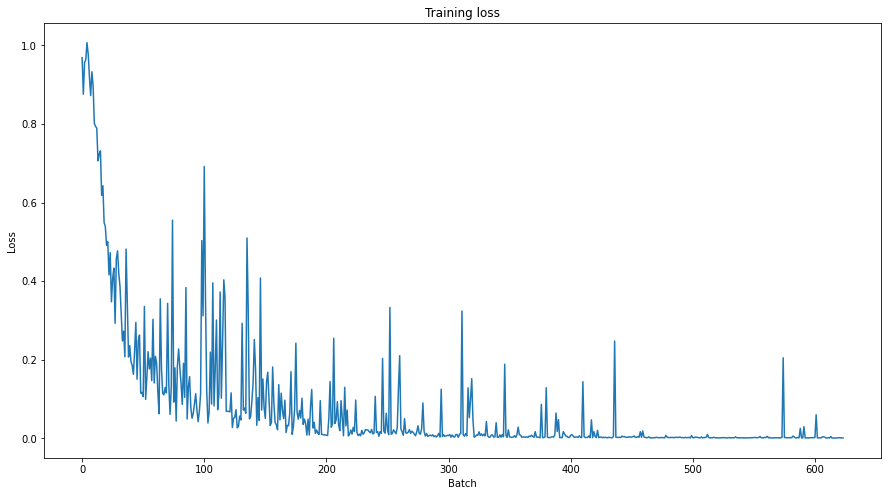

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [ ]:
# Prediction on test set
prediction_inputs = torch.tensor(test_inputs)
prediction_masks = torch.tensor(test_masks)
prediction_labels = torch.tensor(test_labels)
  
batch_size = 32  


prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)
# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  for log in logits:
    predictions.append(log)
  for lab in label_ids:
    true_labels.append(lab)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
preds = np.argmax(predictions, axis=1).flatten()

In [ ]:
print(accuracy_score(preds, true_labels))
print(precision_score(preds, true_labels))
print(recall_score(preds, true_labels))
print(f1_score(preds, true_labels))

0.9942112879884226
1.0
0.9272727272727272
0.9622641509433962
